In [1]:
import numpy as np
from pyod.utils.data import generate_data
from pyod.models.ocsvm import OCSVM
from pyod.models.deep_svdd import DeepSVDD
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.io import loadmat

**Ex. 1**

In [2]:
X_train, X_test, y_train, y_test = generate_data(n_train=300, n_test=200, n_features=3, contamination=0.15, random_state=42)

In [3]:
model = OCSVM(kernel='linear', contamination=0.15)
model.fit(X_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_test_scores = model.decision_function(X_test)

BA = balanced_accuracy_score(y_test, y_test_pred)
AUC = roc_auc_score(y_test, y_test_scores)

print(f"BA: {BA}")
print(f"AUC: {AUC}")

BA: 0.9833333333333334
AUC: 1.0


In [4]:
inlier_idx_train = np.where(y_train==0)[0]
outlier_idx_train = np.where(y_train==1)[0]

inlier_idx_test = np.where(y_test==0)[0]
outlier_idx_test = np.where(y_test==1)[0]

inlier_pred_train = np.where(y_train_pred==0)[0]
outlier_pred_train = np.where(y_train_pred==1)[0]

inlier_pred_test = np.where(y_test_pred==0)[0]
outlier_pred_test = np.where(y_test_pred==1)[0]

Text(0.5, 0.92, 'Test Data - Predicted')

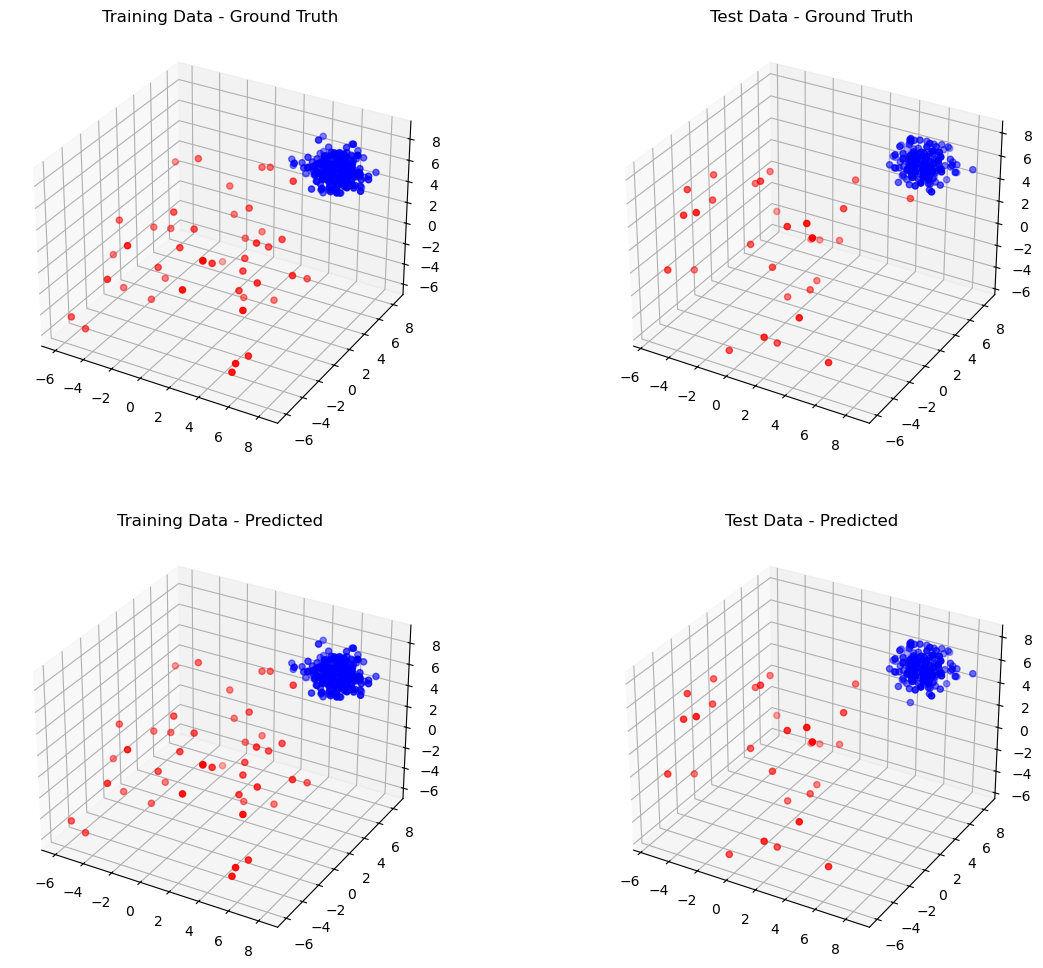

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12), subplot_kw={'projection': '3d'})

ax = axes[0, 0]
ax.scatter(X_train[inlier_idx_train, 0], X_train[inlier_idx_train, 1], X_train[inlier_idx_train, 2], color="blue")
ax.scatter(X_train[outlier_idx_train, 0], X_train[outlier_idx_train, 1], X_train[outlier_idx_train, 2], color="red")
ax.set_title("Training Data - Ground Truth")

ax = axes[0, 1]
ax.scatter(X_test[inlier_idx_test, 0], X_test[inlier_idx_test, 1], X_test[inlier_idx_test, 2], color="blue")
ax.scatter(X_test[outlier_idx_test, 0], X_test[outlier_idx_test, 1], X_test[outlier_idx_test, 2], color="red")
ax.set_title("Test Data - Ground Truth")

ax = axes[1, 0]
ax.scatter(X_train[inlier_pred_train, 0], X_train[inlier_pred_train, 1], X_train[inlier_pred_train, 2], color="blue")
ax.scatter(X_train[outlier_pred_train, 0], X_train[outlier_pred_train, 1], X_train[outlier_pred_train, 2], color="red")
ax.set_title("Training Data - Predicted")

ax = axes[1, 1]
ax.scatter(X_test[inlier_pred_test, 0], X_test[inlier_pred_test, 1], X_test[inlier_pred_test, 2], color="blue")
ax.scatter(X_test[outlier_pred_test, 0], X_test[outlier_pred_test, 1], X_test[outlier_pred_test, 2], color="red")
ax.set_title("Test Data - Predicted")


RBF kernel

BA: 0.9803921568627452
AUC: 0.9998039215686275


Text(0.5, 0.92, 'Test Data - Predicted')

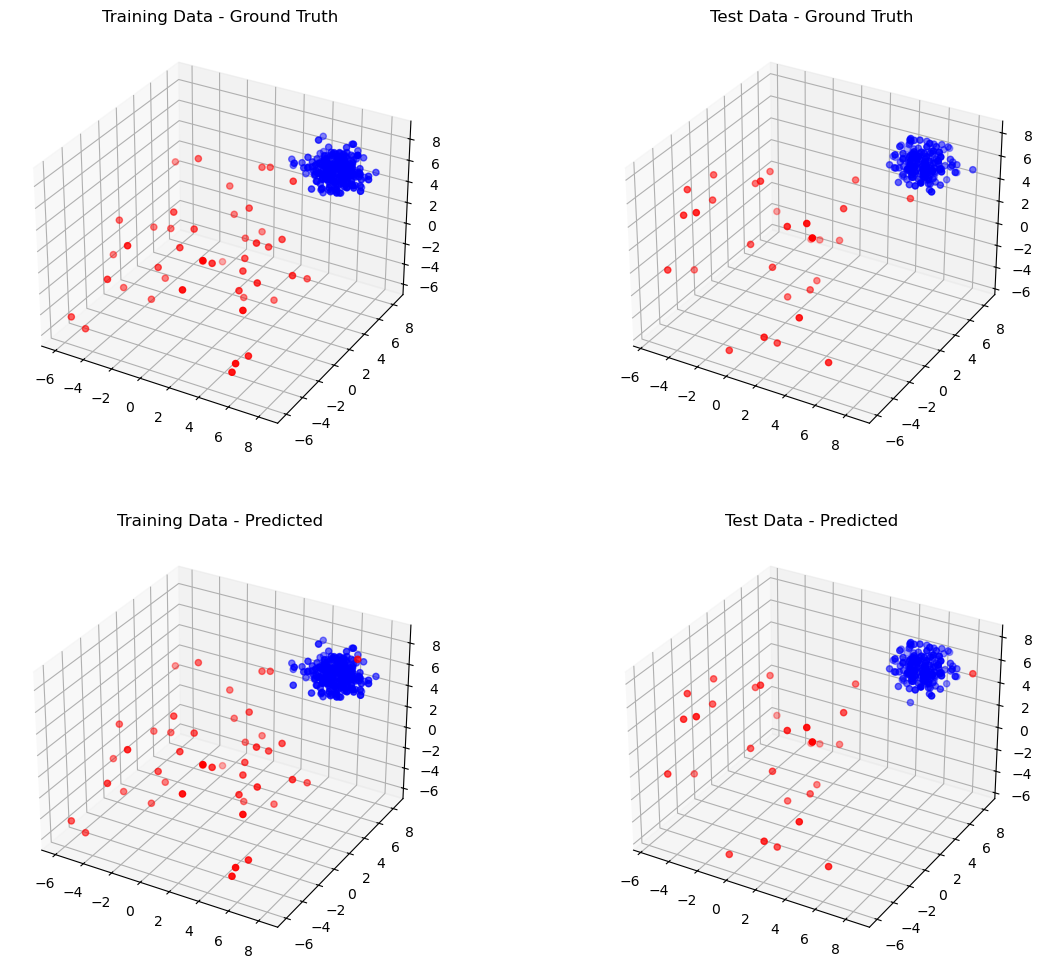

In [6]:
model = OCSVM(kernel='rbf', contamination=0.15)
model.fit(X_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_test_scores = model.decision_function(X_test)

BA = balanced_accuracy_score(y_test, y_test_pred)
AUC = roc_auc_score(y_test, y_test_scores)

print(f"BA: {BA}")
print(f"AUC: {AUC}")

inlier_idx_train = np.where(y_train==0)[0]
outlier_idx_train = np.where(y_train==1)[0]

inlier_idx_test = np.where(y_test==0)[0]
outlier_idx_test = np.where(y_test==1)[0]

inlier_pred_train = np.where(y_train_pred==0)[0]
outlier_pred_train = np.where(y_train_pred==1)[0]

inlier_pred_test = np.where(y_test_pred==0)[0]
outlier_pred_test = np.where(y_test_pred==1)[0]

fig, axes = plt.subplots(2, 2, figsize=(14, 12), subplot_kw={'projection': '3d'})

ax = axes[0, 0]
ax.scatter(X_train[inlier_idx_train, 0], X_train[inlier_idx_train, 1], X_train[inlier_idx_train, 2], color="blue")
ax.scatter(X_train[outlier_idx_train, 0], X_train[outlier_idx_train, 1], X_train[outlier_idx_train, 2], color="red")
ax.set_title("Training Data - Ground Truth")

ax = axes[0, 1]
ax.scatter(X_test[inlier_idx_test, 0], X_test[inlier_idx_test, 1], X_test[inlier_idx_test, 2], color="blue")
ax.scatter(X_test[outlier_idx_test, 0], X_test[outlier_idx_test, 1], X_test[outlier_idx_test, 2], color="red")
ax.set_title("Test Data - Ground Truth")

ax = axes[1, 0]
ax.scatter(X_train[inlier_pred_train, 0], X_train[inlier_pred_train, 1], X_train[inlier_pred_train, 2], color="blue")
ax.scatter(X_train[outlier_pred_train, 0], X_train[outlier_pred_train, 1], X_train[outlier_pred_train, 2], color="red")
ax.set_title("Training Data - Predicted")

ax = axes[1, 1]
ax.scatter(X_test[inlier_pred_test, 0], X_test[inlier_pred_test, 1], X_test[inlier_pred_test, 2], color="blue")
ax.scatter(X_test[outlier_pred_test, 0], X_test[outlier_pred_test, 1], X_test[outlier_pred_test, 2], color="red")
ax.set_title("Test Data - Predicted")

Epoch 1/100, Loss: 10.629589706659317
Epoch 2/100, Loss: 9.947556138038635
Epoch 3/100, Loss: 10.328066051006317
Epoch 4/100, Loss: 9.626774162054062
Epoch 5/100, Loss: 9.686316519975662
Epoch 6/100, Loss: 9.747672259807587
Epoch 7/100, Loss: 9.555346965789795
Epoch 8/100, Loss: 10.046326160430908
Epoch 9/100, Loss: 9.987434267997742
Epoch 10/100, Loss: 9.857267618179321
Epoch 11/100, Loss: 9.860301405191422
Epoch 12/100, Loss: 9.745521605014801
Epoch 13/100, Loss: 10.516153365373611
Epoch 14/100, Loss: 11.679343491792679
Epoch 15/100, Loss: 10.644796907901764
Epoch 16/100, Loss: 9.515344560146332
Epoch 17/100, Loss: 9.812098979949951
Epoch 18/100, Loss: 10.932856678962708
Epoch 19/100, Loss: 9.555543184280396
Epoch 20/100, Loss: 9.530573204159737
Epoch 21/100, Loss: 9.710381656885147
Epoch 22/100, Loss: 10.462288975715637
Epoch 23/100, Loss: 10.764285862445831
Epoch 24/100, Loss: 9.72017017006874
Epoch 25/100, Loss: 9.729900002479553
Epoch 26/100, Loss: 9.552442282438278
Epoch 27/100,

Text(0.5, 0.92, 'Test Data - Predicted')

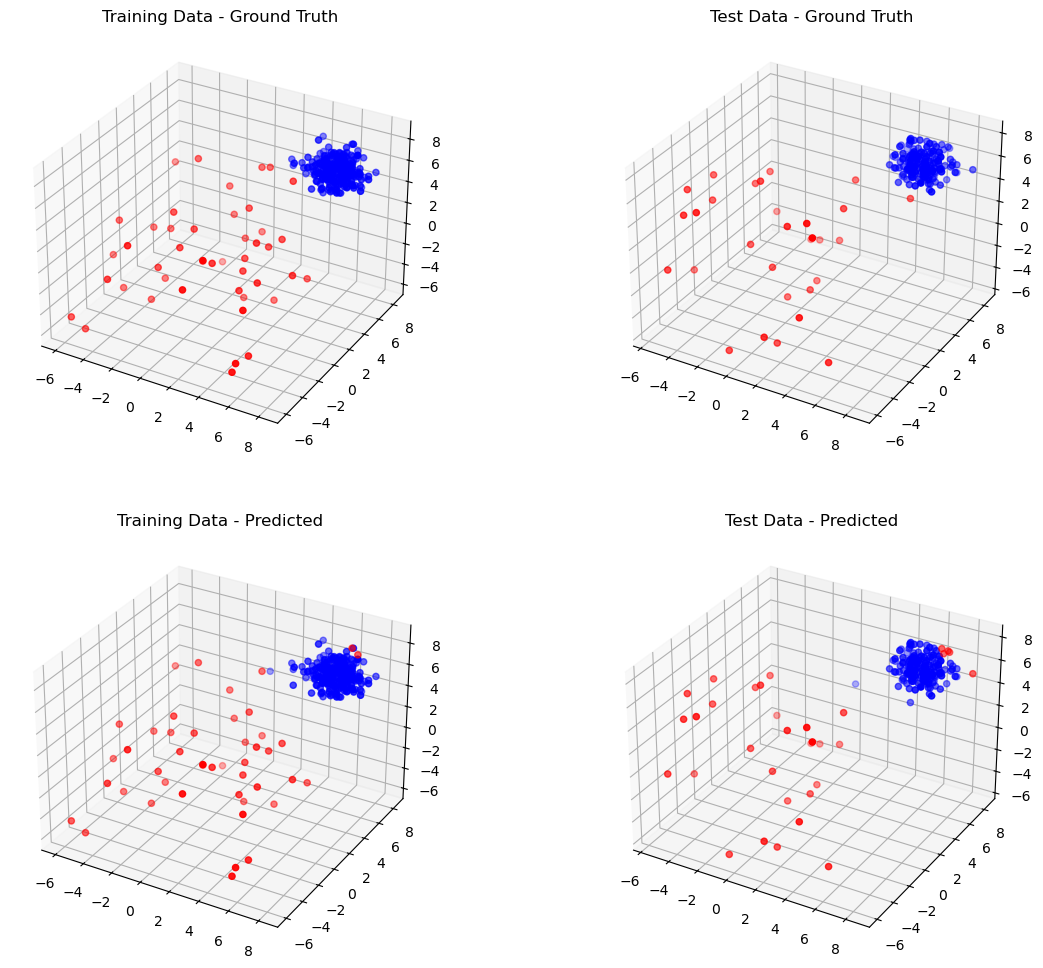

In [7]:
model = DeepSVDD(n_features=3, contamination=0.15)
model.fit(X_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_test_scores = model.decision_function(X_test)

BA = balanced_accuracy_score(y_test, y_test_pred)
AUC = roc_auc_score(y_test, y_test_scores)

print(f"BA: {BA}")
print(f"AUC: {AUC}")

inlier_idx_train = np.where(y_train==0)[0]
outlier_idx_train = np.where(y_train==1)[0]

inlier_idx_test = np.where(y_test==0)[0]
outlier_idx_test = np.where(y_test==1)[0]

inlier_pred_train = np.where(y_train_pred==0)[0]
outlier_pred_train = np.where(y_train_pred==1)[0]

inlier_pred_test = np.where(y_test_pred==0)[0]
outlier_pred_test = np.where(y_test_pred==1)[0]

fig, axes = plt.subplots(2, 2, figsize=(14, 12), subplot_kw={'projection': '3d'})

ax = axes[0, 0]
ax.scatter(X_train[inlier_idx_train, 0], X_train[inlier_idx_train, 1], X_train[inlier_idx_train, 2], color="blue")
ax.scatter(X_train[outlier_idx_train, 0], X_train[outlier_idx_train, 1], X_train[outlier_idx_train, 2], color="red")
ax.set_title("Training Data - Ground Truth")

ax = axes[0, 1]
ax.scatter(X_test[inlier_idx_test, 0], X_test[inlier_idx_test, 1], X_test[inlier_idx_test, 2], color="blue")
ax.scatter(X_test[outlier_idx_test, 0], X_test[outlier_idx_test, 1], X_test[outlier_idx_test, 2], color="red")
ax.set_title("Test Data - Ground Truth")

ax = axes[1, 0]
ax.scatter(X_train[inlier_pred_train, 0], X_train[inlier_pred_train, 1], X_train[inlier_pred_train, 2], color="blue")
ax.scatter(X_train[outlier_pred_train, 0], X_train[outlier_pred_train, 1], X_train[outlier_pred_train, 2], color="red")
ax.set_title("Training Data - Predicted")

ax = axes[1, 1]
ax.scatter(X_test[inlier_pred_test, 0], X_test[inlier_pred_test, 1], X_test[inlier_pred_test, 2], color="blue")
ax.scatter(X_test[outlier_pred_test, 0], X_test[outlier_pred_test, 1], X_test[outlier_pred_test, 2], color="red")
ax.set_title("Test Data - Predicted")

**Ex. 2**

In [8]:
from sklearn.svm import OneClassSVM
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer

In [9]:
data = loadmat("cardio 1.mat")
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [10]:
X = data['X']
y_pyod = data['y'].ravel()

y = 1 - 2 * y_pyod

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.4, random_state=42, shuffle=True)

In [11]:
pipeline = Pipeline(
    [('scaler', StandardScaler()),
     ('ocsvm', OneClassSVM())]
)

param_grid = {
    'ocsvm__kernel': ['linear', 'rbf', 'poly'],
    'ocsvm__gamma': ['scale', 'auto', 0.01, 0.1, 0.5, 1],
    'ocsvm__nu': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
}

scorer = make_scorer(balanced_accuracy_score)

grid = GridSearchCV(
    estimator = pipeline,
    param_grid = param_grid,
    scoring = 'balanced_accuracy',
    cv = 5,
    n_jobs = -1
)

grid.fit(X_train, y_train)

,estimator,Pipeline(step...eClassSVM())])
,param_grid,"{'ocsvm__gamma': ['scale', 'auto', ...], 'ocsvm__kernel': ['linear', 'rbf', ...], 'ocsvm__nu': [0.1, 0.2, ...]}"
,scoring,'balanced_accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [12]:
best_params = grid.best_params_
best_score = grid.best_score_
print(f"Best parameters: {best_params}")
print(f"Score for best estimator on training set: {best_score}")

Best parameters: {'ocsvm__gamma': 0.01, 'ocsvm__kernel': 'rbf', 'ocsvm__nu': 0.3}
Score for best estimator on training set: 0.8754121889722135


In [13]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

BA = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced accuracy on test set: {BA}")

Balanced accuracy on test set: 0.8675541167375338


**Ex 3**

In [14]:
data = loadmat("shuttle 1.mat")
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [15]:
X = data['X']
y = data['y'].ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=42, shuffle=True)

In [16]:
print(X.shape)

(49097, 9)


In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = OCSVM()
model.fit(X_train_scaled)

y_test_pred = model.predict(X_test_scaled)
y_test_scores = model.decision_function(X_test_scaled)

BA = balanced_accuracy_score(y_test, y_test_pred)
AUC = roc_auc_score(y_test, y_test_scores)

print(f"BA: {BA}")
print(f"AUC: {AUC}")

BA: 0.9710031279243976
AUC: 0.9918840768138005


In [18]:
model = DeepSVDD(n_features=9)
model.fit(X_train_scaled)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)
y_test_scores = model.decision_function(X_test_scaled)

BA = balanced_accuracy_score(y_test, y_test_pred)
AUC = roc_auc_score(y_test, y_test_scores)

print(f"BA: {BA}")
print(f"AUC: {AUC}")

Epoch 1/100, Loss: 504.5129788964987
Epoch 2/100, Loss: 504.94167794287205
Epoch 3/100, Loss: 504.9052427262068
Epoch 4/100, Loss: 505.25111931562424
Epoch 5/100, Loss: 504.4711903780699
Epoch 6/100, Loss: 504.7352444976568
Epoch 7/100, Loss: 504.53735649585724
Epoch 8/100, Loss: 504.4931129962206
Epoch 9/100, Loss: 504.57808868587017
Epoch 10/100, Loss: 504.5731665343046
Epoch 11/100, Loss: 504.49335876107216
Epoch 12/100, Loss: 504.7422658354044
Epoch 13/100, Loss: 504.5873493105173
Epoch 14/100, Loss: 504.69466449320316
Epoch 15/100, Loss: 504.560401275754
Epoch 16/100, Loss: 504.70039670169353
Epoch 17/100, Loss: 504.4890062212944
Epoch 18/100, Loss: 504.46627132594585
Epoch 19/100, Loss: 504.7251029461622
Epoch 20/100, Loss: 504.5775038301945
Epoch 21/100, Loss: 504.45136973261833
Epoch 22/100, Loss: 504.47119180858135
Epoch 23/100, Loss: 504.4184407442808
Epoch 24/100, Loss: 504.73443046212196
Epoch 25/100, Loss: 504.4351409897208
Epoch 26/100, Loss: 505.24073550105095
Epoch 27/1

In [19]:
architectures = [[16, 8], [64, 32, 16, 8], [128, 128, 16]]

for arch in architectures:
    model = DeepSVDD(n_features=9, hidden_neurons = arch)
    model.fit(X_train_scaled)
    
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    y_test_scores = model.decision_function(X_test_scaled)
    
    BA = balanced_accuracy_score(y_test, y_test_pred)
    AUC = roc_auc_score(y_test, y_test_scores)
    
    print(f"BA for architecture {arch}: {BA}")
    print(f"AUC for architecture {arch}: {AUC}")

Epoch 1/100, Loss: 118.83013901952654
Epoch 2/100, Loss: 118.89591324515641
Epoch 3/100, Loss: 118.84192432463169
Epoch 4/100, Loss: 118.92851142305881
Epoch 5/100, Loss: 118.77055896632373
Epoch 6/100, Loss: 118.79782226122916
Epoch 7/100, Loss: 118.86852594278753
Epoch 8/100, Loss: 118.92097993008792
Epoch 9/100, Loss: 118.73078858945519
Epoch 10/100, Loss: 118.73327336553484
Epoch 11/100, Loss: 118.73839100822806
Epoch 12/100, Loss: 118.91029449179769
Epoch 13/100, Loss: 118.79242134466767
Epoch 14/100, Loss: 118.90795131400228
Epoch 15/100, Loss: 118.89454224333167
Epoch 16/100, Loss: 118.8265916807577
Epoch 17/100, Loss: 118.75146934017539
Epoch 18/100, Loss: 118.7340909410268
Epoch 19/100, Loss: 118.97494006343186
Epoch 20/100, Loss: 118.73345782980323
Epoch 21/100, Loss: 118.73134453501552
Epoch 22/100, Loss: 118.74796438962221
Epoch 23/100, Loss: 118.83827158994973
Epoch 24/100, Loss: 118.80257160775363
Epoch 25/100, Loss: 118.75117294490337
Epoch 26/100, Loss: 118.812786445021